# DPG11 Pulser Driver Example
----------------------------------
In this document, I will outline how to use the dpg11 as a pulser for the qt3utils cwodmr program (for now, I will add pulsed odmr and other measurements in the future). There is existing documentation for the qt3utils cwodmr program, hence I will just focus on the dpg11 driver.

## DPG11 Driver
The dpg11 python driver is availble in the dpg11_pylib library. I will make this library pip installable in the future, but for now, you can find it on the github page [here](https://github.com/UW-Quantum-Defect-Lab/dpg11_lib). To install it, simply clone the repository and run `python setup.py install` from the root directory. This will install the dpg11 library to your python site-packages directory.

If you are interested in the dpg11 driver, I would recommend looking at the github library page, as it has more detailed documentation. 

The major details are not important. To be able to control the dpg11, you must install the wavepond gui, which I have also included in the github repository. To initialize the dpg11 driver object, you must provide the full path to the wavepond gui. Folders will be created to save waveforms and scripts. Again, more information will be found on the github page for this.

## DPG11 Pulser
To integrate the dpg11 with the existing qt3utils code, I have created a new pulser class called 'DPG11Pulser'. This class is located in the qt3utils package (qt3utils/pulsers/dpg11.py). This class is a subclass of the existing 'Pulser' class, and hence has all the same methods and attributes. The only difference is that the 'DPG11Pulser' class uses the dpg11 driver to control the pulser, rather than the existing 'PulseBlaster' class. This contains basic functions such as start, stop, and reset which will be used for all pulsers in most experiments.

## DPG11 CWODMR Pulser
Then, there is another subclass called DPG11CWODMRPulser which has all of the functionality for running CWODMR. Similar classes for but more functionality for experiments such as Rabi, Ramsey, and pulsed ODMR will be added in the future.

The main function utilized for the CWODMR experiment is the program_pulser_state function, which creates and loads the pulse sequences for the clock, rf, AOM, and trigger signals that will be loop continuously for the duration of the measurment. This only loads the waveforms. They will be ran when the start function is called in the actual cwodmr code. I will go over this.

## Extra functionality
Within the dpg11_pylib, I have included a subpackage called visualiziation which contains a few functions for visualizing the waveforms that are created. This is not necessary, but I have found it useful for debugging. 

The main module in that subpackage, called plotting, has two very useful functions: plot_waveforms and plot_dpg11_wavefiles. plot_waveforms will plot digital signals of 0's and 1's from a list or array. plot_dpg11_wavefiles will plot the waveforms that are created by the dpg11 driver. This is useful for debugging, as you can see if the waveforms are being created correctly. I will use this one in the example. 


# Example

First, we must import all of the relevant packages.

In [1]:
# Import dpg11 pulser code
from dpg11 import DPG11CWODMRPulser
# Import dpg11 driver and visualization modules
from dpg11_pylib import driver, visualization

Now, we must create the dpg11 driver object, making sure to provide the full path to the wavpond gui folder. 

In [2]:
# Get the driver path
driver_path = "/Users/ethanhansen/Dropbox/35share/Python/Ethan/Libraries/dpg11_git/dpg11_lib/testing/app"

# create the dpg11 dev object. This will be passed to the pulser object.
dev = driver.DPG11Device(driver_path)

You should now check the driver path and make sure the script, wavefile, and multi_wavefiles folders have been created.

Now, you want to create the dpg11 pulser object, where you must provide the dpg11 driver object as an argument. Additionally, you must provide the channel numbers for the AOM, rf, clock, and trigger signals. The waveforms will be output to the respective channels on the DPG11 device, so make sure the connections are right. You must also provide the rf_pulse_duration in seconds (the duration to have the rf pulse on for. It will then be off for the same amount of time, and loop after that), the clock_period in seconds (the period of the clock signal), and the trigger_width in seconds (the width of the trigger signal).

It should be noted that the dpg11 requires waveforms that are modulous 64 in length, hence the overall cycle length (which is 2*rf_pulse_duration) must be modulous 64. To acheive this, this rf_pulse_duration is adjusted in the code to be modulous 64 length given the sample rate. 

In [3]:
# Create the pulse object
# Here you could set any pulse paramters that you want, but I am using the defaults for now.
cwodmr_pulser = DPG11CWODMRPulser(dev)

Now, run the program_pulser_state function to initialize the waveforms. Again, this only loads the waveforms. They will be ran when the start function is called.

In [4]:
# initialize the waveforms
cwodmr_pulser.program_pulser_state()

reset :)


Now we will plot the wavefile to make sure that things look okay.

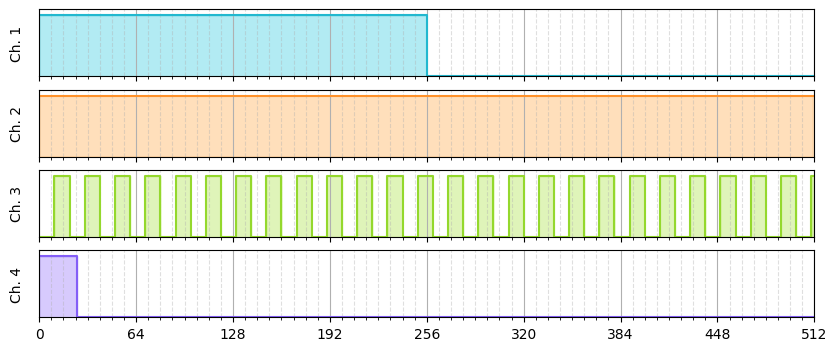

In [5]:
# Plot the wavefile
# First, get the path to the wavefile from the cwodmr_pulser object
path = dev.directory + "/" + cwodmr_pulser.wavefile_name
# Now plot the wavefile, but only channels 1 - 4
visualization.plot_dpg11_wavefile(path,
                                  plot_channels=[1, 2, 3, 4],
                                  grid_spacing=[64, 8])

Now that the waveforms are loaded, and look good, we can start the pulser. This will start the waveforms that were loaded in the previous step. And we should see this same output on the data generator.

In [6]:
# Start the pulse sequence, which will just run on a loop until you stop it.
cwodmr_pulser.start()

Now, when we want to stop it, we can run the stop function. This will stop the data generator from outputing anything.

In [7]:
# Stop the output for the pulser to stop the looping.
cwodmr_pulser.stop()